<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Feature%20Selection/Recursive_feature_elimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable.

Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.




## Load the data

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

In [3]:
print('Shape of feature set', X.shape , 'Shape of target set',y.shape)

Shape of feature set (1797, 64) Shape of target set (1797,)


## RFE

A recursive feature elimination example showing the relevance of pixels in a digit classification task.

In [4]:
# Estimator
svc = SVC(kernel='linear')

rfe = RFE(estimator=svc, n_features_to_select=32)
rfe.fit(X,y)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=32)

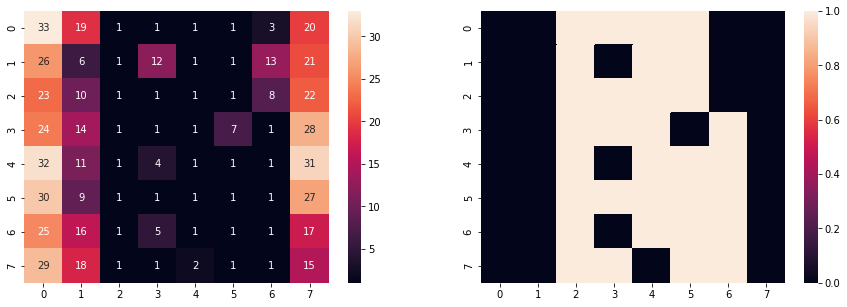

In [5]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
sns.heatmap(rfe.ranking_.reshape(digits.images.shape[1:]), annot=True, ax=ax1)
ax2 = plt.subplot(122)
sns.heatmap(rfe.support_.reshape(digits.images.shape[1:]), ax=ax2);

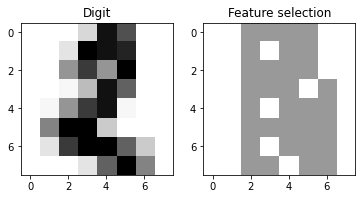

In [51]:
plt.subplot(121)
plt.imshow(digits.images[2], cmap=plt.cm.Greys)
plt.title('Digit')
plt.subplot(122)
plt.imshow(rfe.support_.reshape(digits.images.shape[1:]), alpha=0.4, cmap=plt.cm.Greys)
plt.title('Feature selection');

## RFECV

Recursive feature elimination with cross-validation to select the number of features.

## Create some data

In [6]:
# Build a classification task using 3 informative features
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

In [7]:
# estimator
svc = SVC(kernel="linear")

# RFECV
rfecv = RFECV(estimator=svc, cv = StratifiedKFold(), scoring='accuracy',  min_features_to_select=1)
rfecv.fit(X,y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

In [8]:
rfecv.ranking_

array([ 3,  1, 10, 17, 13,  4, 15,  1,  1, 19, 21,  9, 14,  8, 11, 20,  6,
       12,  1, 18,  5,  7,  1,  2, 16])

In [9]:
rfecv.n_features_

5

In [10]:
rfecv.cv_results_

{'mean_test_score': array([0.257, 0.51 , 0.81 , 0.816, 0.817, 0.806, 0.793, 0.794, 0.792,
        0.791, 0.791, 0.783, 0.778, 0.771, 0.765, 0.774, 0.776, 0.763,
        0.764, 0.768, 0.755, 0.761, 0.768, 0.752, 0.749]),
 'split0_test_score': array([0.25 , 0.475, 0.82 , 0.84 , 0.84 , 0.825, 0.81 , 0.805, 0.815,
        0.8  , 0.81 , 0.805, 0.78 , 0.795, 0.775, 0.78 , 0.805, 0.795,
        0.79 , 0.785, 0.765, 0.77 , 0.775, 0.78 , 0.77 ]),
 'split1_test_score': array([0.305, 0.54 , 0.81 , 0.805, 0.805, 0.785, 0.79 , 0.79 , 0.775,
        0.78 , 0.78 , 0.77 , 0.795, 0.78 , 0.79 , 0.795, 0.78 , 0.79 ,
        0.78 , 0.785, 0.765, 0.755, 0.775, 0.755, 0.765]),
 'split2_test_score': array([0.235, 0.565, 0.79 , 0.795, 0.8  , 0.805, 0.775, 0.775, 0.79 ,
        0.805, 0.8  , 0.795, 0.78 , 0.76 , 0.735, 0.735, 0.73 , 0.735,
        0.735, 0.74 , 0.745, 0.775, 0.765, 0.735, 0.72 ]),
 'split3_test_score': array([0.265, 0.51 , 0.84 , 0.845, 0.845, 0.84 , 0.83 , 0.845, 0.835,
        0.825, 0.815, 

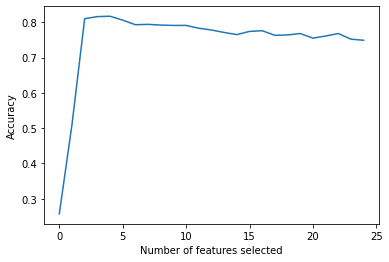

In [55]:
plt.plot(rfecv.cv_results_['mean_test_score'])
plt.ylabel('Accuracy')
plt.xlabel('Number of features selected');